In [1]:
import cv2
import matplotlib.pyplot as plt
from utils.ImageProcess.ImageProcess import cv2Bgr2Rgb,normalizeStaining,readMatFile
import matplotlib.pyplot as plt
from utils.ImageProcess.ImgShow import showLineImg
import scipy.io as scio
import os
import numpy as np



(32, 500, 500, 3)


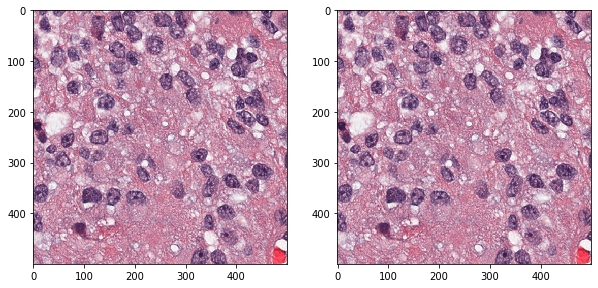

In [3]:
'''
开始数据转换
'''
# 将所有的文件转换成npy文件
# 所有的文件转化为需要的个格式
# 这边保存的是原图
# Dataset/cpm17/cmp17Dataset
# trainPathInit = './train/Images'
name = 'test'
trainPathInit = f'./{name}/Images'
# 这边是生成的图片的路径
# trainSavePath = './cmp17Dataset/train/trainDataSet.npy'
trainSavePath = f'./cmp17Dataset/{name}/{name}DataSet.npy'

def readImg(initPath,savePath):
    imgList = []
    for image in sorted(os.listdir(initPath)):
        imagePath = initPath+'/'+image
        img = cv2Bgr2Rgb(imagePath)
        imgNor,_,_ = normalizeStaining(img)
        imgNor = cv2.resize(imgNor,(500,500))
        imgList.append(imgNor)
    imgArray = np.array(imgList)
    # 打印数组的shape
    print(imgArray.shape)
    np.save(savePath,imgArray)
    return imgArray

imgArray = readImg(trainPathInit,trainSavePath)
# dataset = np.load(trainSavePath)
# print(dataset.shape,dataset[0].shape)
showLineImg([imgArray[0],imgArray[0]])




(32, 500, 500)


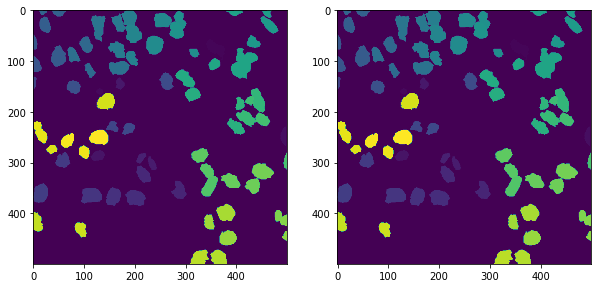

In [6]:
# 对label文件进行处理
name = 'test'

labelInit = f'./{name}/Labels'

labelSaveInit = f'./cmp17Dataset/{name}/labelDataSet.npy'

def readLabel(initPath,savePath):
    labelList = []
    for label in sorted(os.listdir(initPath)):
        path = initPath+'/'+label
        labelImg = readMatFile(path)
        labelImg = labelImg.astype('uint8')
        labelImg = cv2.resize(labelImg,(500,500))
        labelList.append(labelImg)
    labelArray = np.array(labelList)
    np.save(savePath,labelArray)
    return labelArray

labelArray = readLabel(labelInit,labelSaveInit)
print(labelArray.shape)
showLineImg([labelArray[0],labelArray[0]])

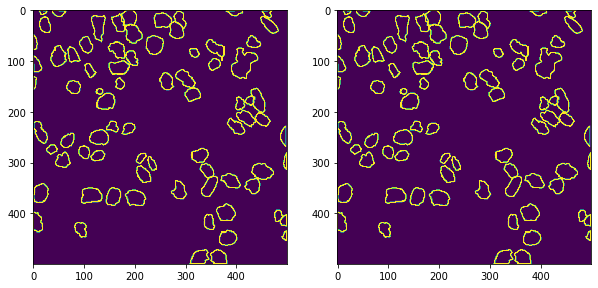

In [8]:
# 对bounds文件进行处理
name = 'test'

boundInit = f'./{name}/Overlay'
boundSaveInit = f'./cmp17Dataset/{name}/boundDataSet.npy'

def readBound(initPath,savePath):
    boundList = []
    for bound in sorted(os.listdir(initPath)):
        boundPath = initPath+'/'+bound
        image = cv2Bgr2Rgb(boundPath)
        # 对image进行处理
        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
                pixel = image[h][w]
                # 边界的标记上面必然有一个通道是0
                if pixel[0]!= 0 and pixel[1]!= 0 and pixel[2]!= 0:
                    image[h][w] = [0,0,0]
                else:
                    image[h][w] = [255,255,255]
        singleChannel = image[:,:,0] # 返回的数据还是（1000,1000）格式的数据
        singleChannel = singleChannel.astype('uint8')
        singleChannel = cv2.resize(singleChannel,(500,500))
        boundList.append(singleChannel)
    boundArray = np.array(boundList)
    np.save(savePath,boundArray)
    return boundArray
# 
boundArray = readBound(boundInit,boundSaveInit)
showLineImg([boundArray[0],boundArray[0]])





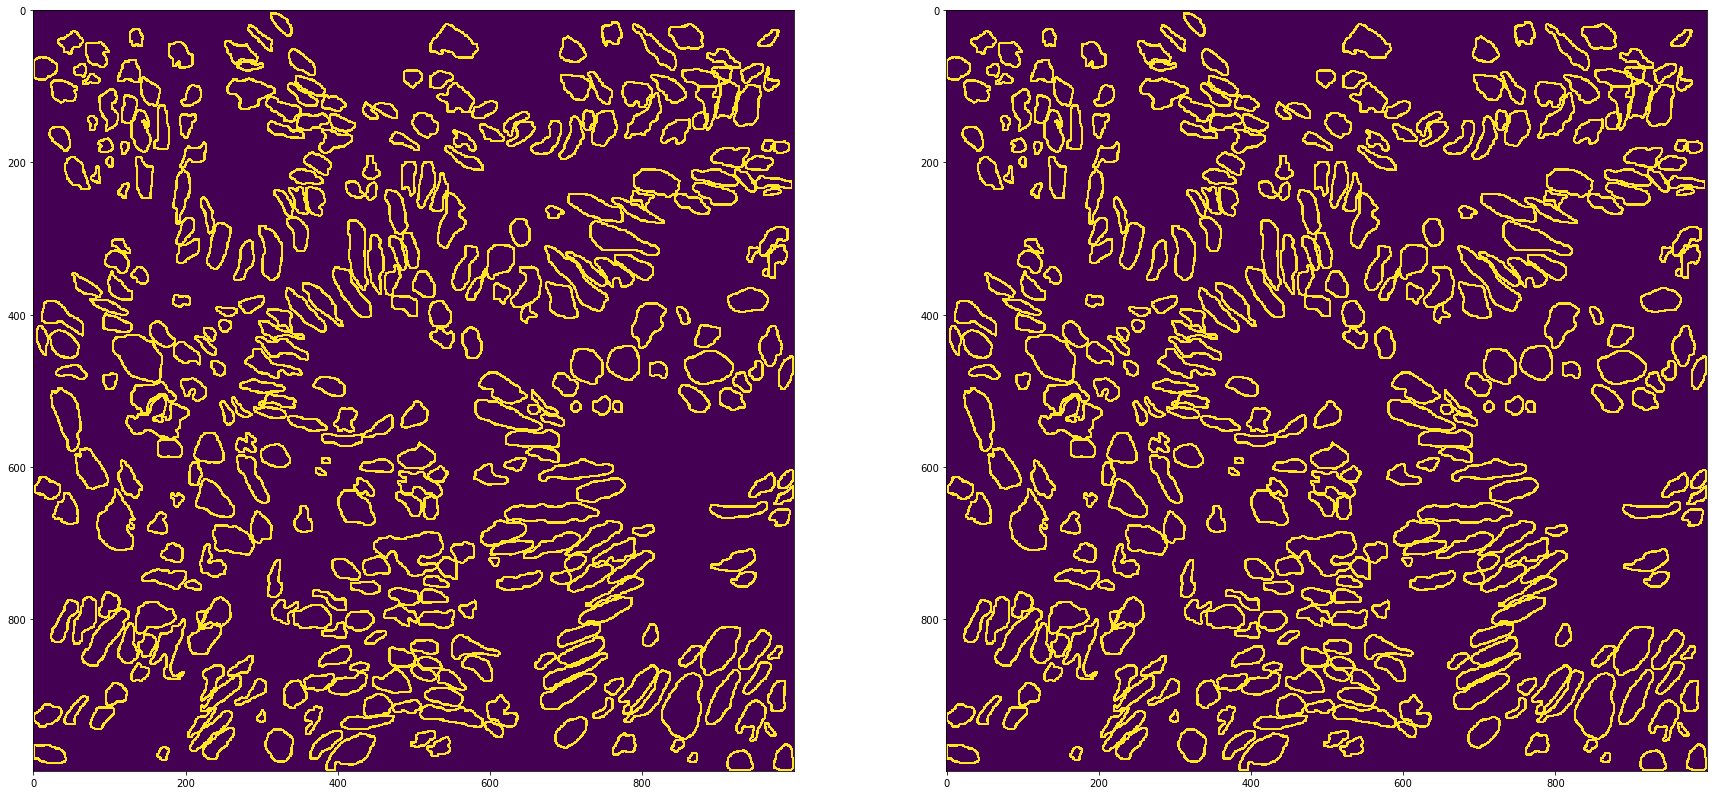

In [27]:



# 测试文件的操作
# Dataset/kumar/kumarDataset/bounds/boundSameDataSet.npy
# Dataset/kumar/kumarDataset/bounds/boundDiffDataSet.npy
bounds = np.load('./kumarDataset/bounds/boundDiffDataSet.npy')
boundImg = bounds[0]
showLineImg([boundImg,boundImg],figsize=(30,30))